# Import Necessary Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import collections
import os
import json
import pickle
import keras
import warnings
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

warnings.filterwarnings('ignore')
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5



# Load the Train Test Split

In [53]:
X_train = np.load(os.path.join("..", "IPD", "x_train.npy"))
X_test = np.load(os.path.join("..", "IPD", "x_test.npy"))
Y_train = np.load(os.path.join("..", "IPD", "y_train.npy"))
Y_test = np.load(os.path.join("..", "IPD", "y_test.npy"))
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (332, 250, 12) 
Testing Samples : (83, 250, 12)
Training Labels : (332,) 
Testing Labels : (83,)


In [54]:
_, num_timeframes, num_features = X_train.shape

# Reshape data for model

In [55]:
X_train = X_train.reshape((-1,num_timeframes,num_features,1))
X_test = X_test.reshape((-1,num_timeframes,num_features,1))
Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (332, 250, 12, 1) 
Testing Samples : (83, 250, 12, 1)
Training Labels : (332, 6) 
Testing Labels : (83, 6)


# CNN Model

In [89]:
input_shape = X_train[0].shape
batch_size = 5
epochs = 250

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='tanh',
                 input_shape=input_shape))
model.add(Conv2D(12, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 246, 8, 6)         156       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 244, 6, 12)        660       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 122, 3, 12)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 122, 3, 12)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4392)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 12)                52716     
_________________________________________________________________
dropout_46 (Dropout)         (None, 12)              

In [90]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, Y_test))

Train on 332 samples, validate on 83 samples
Epoch 1/250
332/332 [==============================] - 1s 2ms/step - loss: 1.8325 - accuracy: 0.1506 - val_loss: 1.7925 - val_accuracy: 0.0843
Epoch 2/250
332/332 [==============================] - 0s 880us/step - loss: 1.7884 - accuracy: 0.1837 - val_loss: 1.7956 - val_accuracy: 0.0964
Epoch 3/250
332/332 [==============================] - 0s 871us/step - loss: 1.7775 - accuracy: 0.1958 - val_loss: 1.8010 - val_accuracy: 0.0964
Epoch 4/250
332/332 [==============================] - 0s 898us/step - loss: 1.7761 - accuracy: 0.2048 - val_loss: 1.7949 - val_accuracy: 0.1205
Epoch 5/250
332/332 [==============================] - 0s 883us/step - loss: 1.7691 - accuracy: 0.2018 - val_loss: 1.7648 - val_accuracy: 0.1687
Epoch 6/250
332/332 [==============================] - 0s 886us/step - loss: 1.7184 - accuracy: 0.2349 - val_loss: 2.5001 - val_accuracy: 0.2048
Epoch 7/250
332/332 [==============================] - 0s 880us/step - loss: 1.5876 - a

Epoch 57/250
332/332 [==============================] - 0s 895us/step - loss: 0.1924 - accuracy: 0.9096 - val_loss: 0.2102 - val_accuracy: 0.8916
Epoch 58/250
332/332 [==============================] - 0s 880us/step - loss: 0.2035 - accuracy: 0.9127 - val_loss: 0.2409 - val_accuracy: 0.8554
Epoch 59/250
332/332 [==============================] - 0s 884us/step - loss: 0.1657 - accuracy: 0.9458 - val_loss: 0.2436 - val_accuracy: 0.8795
Epoch 60/250
332/332 [==============================] - 0s 901us/step - loss: 0.1675 - accuracy: 0.9307 - val_loss: 0.2964 - val_accuracy: 0.8193
Epoch 61/250
332/332 [==============================] - 0s 892us/step - loss: 0.1923 - accuracy: 0.9127 - val_loss: 0.2189 - val_accuracy: 0.8675
Epoch 62/250
332/332 [==============================] - 0s 895us/step - loss: 0.1574 - accuracy: 0.9428 - val_loss: 0.2879 - val_accuracy: 0.8675
Epoch 63/250
332/332 [==============================] - 0s 910us/step - loss: 0.1532 - accuracy: 0.9428 - val_loss: 0.2138 -

332/332 [==============================] - 0s 901us/step - loss: 0.0981 - accuracy: 0.9578 - val_loss: 0.3296 - val_accuracy: 0.9036
Epoch 114/250
332/332 [==============================] - 0s 899us/step - loss: 0.1404 - accuracy: 0.9458 - val_loss: 0.2808 - val_accuracy: 0.9036
Epoch 115/250
332/332 [==============================] - 0s 917us/step - loss: 0.0940 - accuracy: 0.9608 - val_loss: 0.3401 - val_accuracy: 0.8916
Epoch 116/250
332/332 [==============================] - 0s 909us/step - loss: 0.0850 - accuracy: 0.9699 - val_loss: 0.2834 - val_accuracy: 0.8795
Epoch 117/250
332/332 [==============================] - 0s 901us/step - loss: 0.1220 - accuracy: 0.9398 - val_loss: 0.3090 - val_accuracy: 0.8916
Epoch 118/250
332/332 [==============================] - 0s 904us/step - loss: 0.0888 - accuracy: 0.9608 - val_loss: 0.2802 - val_accuracy: 0.8795
Epoch 119/250
332/332 [==============================] - 0s 904us/step - loss: 0.0698 - accuracy: 0.9819 - val_loss: 0.3383 - val_ac

Epoch 169/250
332/332 [==============================] - 0s 892us/step - loss: 0.1225 - accuracy: 0.9639 - val_loss: 0.3376 - val_accuracy: 0.8434
Epoch 170/250
332/332 [==============================] - 0s 889us/step - loss: 0.0547 - accuracy: 0.9819 - val_loss: 0.3340 - val_accuracy: 0.8675
Epoch 171/250
332/332 [==============================] - 0s 925us/step - loss: 0.0859 - accuracy: 0.9639 - val_loss: 0.3405 - val_accuracy: 0.8675
Epoch 172/250
332/332 [==============================] - 0s 911us/step - loss: 0.0931 - accuracy: 0.9578 - val_loss: 0.2980 - val_accuracy: 0.8795
Epoch 173/250
332/332 [==============================] - 0s 892us/step - loss: 0.1363 - accuracy: 0.9518 - val_loss: 0.3275 - val_accuracy: 0.9036
Epoch 174/250
332/332 [==============================] - 0s 898us/step - loss: 0.0767 - accuracy: 0.9699 - val_loss: 0.2914 - val_accuracy: 0.8916
Epoch 175/250
332/332 [==============================] - 0s 895us/step - loss: 0.0682 - accuracy: 0.9759 - val_loss: 0

Epoch 225/250
332/332 [==============================] - 0s 904us/step - loss: 0.0453 - accuracy: 0.9819 - val_loss: 0.4344 - val_accuracy: 0.8795
Epoch 226/250
332/332 [==============================] - 0s 898us/step - loss: 0.0813 - accuracy: 0.9729 - val_loss: 0.3574 - val_accuracy: 0.8916
Epoch 227/250
332/332 [==============================] - 0s 895us/step - loss: 0.0714 - accuracy: 0.9669 - val_loss: 0.3431 - val_accuracy: 0.8916
Epoch 228/250
332/332 [==============================] - 0s 901us/step - loss: 0.0585 - accuracy: 0.9759 - val_loss: 0.4866 - val_accuracy: 0.8434
Epoch 229/250
332/332 [==============================] - 0s 899us/step - loss: 0.0699 - accuracy: 0.9759 - val_loss: 0.3679 - val_accuracy: 0.8916
Epoch 230/250
332/332 [==============================] - 0s 909us/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.3136 - val_accuracy: 0.9036
Epoch 231/250
332/332 [==============================] - 0s 898us/step - loss: 0.0343 - accuracy: 0.9849 - val_loss: 0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


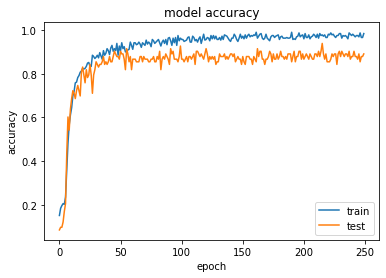

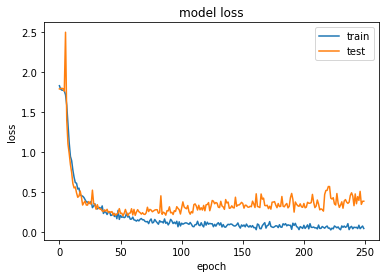

In [91]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [92]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

83/83 [==============================] - 0s 132us/step
Test loss: 0.3904702620333936
Test accuracy: 0.891566276550293


# Saving model

In [93]:
model.save(os.path.join("..", "IPD", "CNN_model.h5"))
print("Model Saved")

Model Saved
